# Edge Detection

![Task](pics/task.jpg)

In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline

In [2]:
ny = cv.imread('pics/ny.jpg', 0)
spb = cv.imread('pics/spb.jpg', 0)
city = cv.imread('pics/city.jpg', 0)

# Convolution



In [3]:
def apply_kernel(img, kernel):
    K = kernel.shape[0]
    height = img.shape[0] - (K // 2) * 2
    width = img.shape[1] - (K // 2) * 2
    res = np.zeros((height, width))
    for i in np.arange(height):
        for j in np.arange(width):
            m = img[i:i+K, j:j+K] * kernel
            res[i][j] = m.sum()
    return np.clip(res, 0, 255).astype(np.uint8)

In [4]:
kernel = np.array([[1, 0], [0, -1]])
spb_apply_kernel = apply_kernel(spb, kernel)
spb_cv_filtered = cv.filter2D(spb, -1, kernel)
np.all(spb_cv_filtered[1:-1, 1:-1] == spb_apply_kernel) # compare to cv

True

In [5]:
%%timeit
apply_kernel(spb, kernel)

1.83 s ± 71.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
cv.filter2D(spb, -1, kernel)

154 µs ± 6.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Roberts Operator

* Mark edge point only
* No information about edge orientation
* Work best with binary images
* Primary disadvantage:
  * High sensitivity to noise
  * Few pixels are used to approximate the gradient
  
$$
\sqrt{\left[ I(r, c) - I(r - 1, c - 1) \right]^2 + \left[ I(r, c - 1) - I(r - 1, c) \right]^2}
$$

$$
\left| I(r, c) - I(r - 1, c - 1) \right| + \left| I(r, c - 1) - I(r - 1, c) \right|
$$

$$
h_1 = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix},
h_2 = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}
$$

In [7]:
h1 = np.array([
    [1, 0],
    [0, -1]
])
h2 = np.array([
    [0, 1],
    [-1, 0]
])
def roberts(img):
    img_h1 = cv.filter2D(img, -1, h1)
    img_h2 = cv.filter2D(img, -1, h2)
    img_roberts = np.abs(img_h1) + np.abs(img_h2)
    return img_roberts, img_h1, img_h2

In [8]:
def plot_roberts(img, name, figsize=(12, 9)):
    img_roberts, img_h1, img_h2 = roberts(img)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    axes[0][0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[0][0].set_title('Исходное изображение')
    axes[0][0].axis('off')

    axes[0][1].imshow(img_roberts, cmap='gray')
    axes[0][1].set_title('Применение фильтра Робертса')
    axes[0][1].axis('off')
    
    axes[1][0].imshow(img_h1, cmap='gray')
    axes[1][0].set_title('Применение "горизонтального" фильтра Робертса')
    axes[1][0].axis('off')
    
    axes[1][1].imshow(img_h2, cmap='gray')
    axes[1][1].set_title('Применение "вертикального" фильтра Робертса')
    axes[1][1].axis('off')

    fig.tight_layout()
    plt.savefig('pics/' + name + '_roberts.png')
    plt.show()

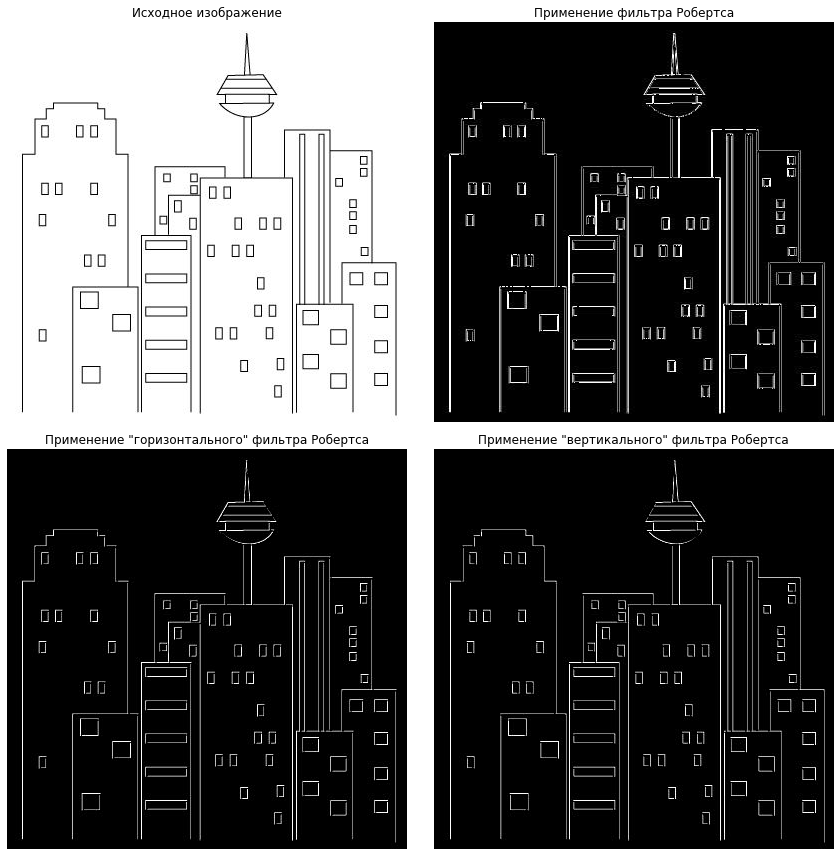

In [9]:
plot_roberts(city, 'city', figsize=(12, 12))

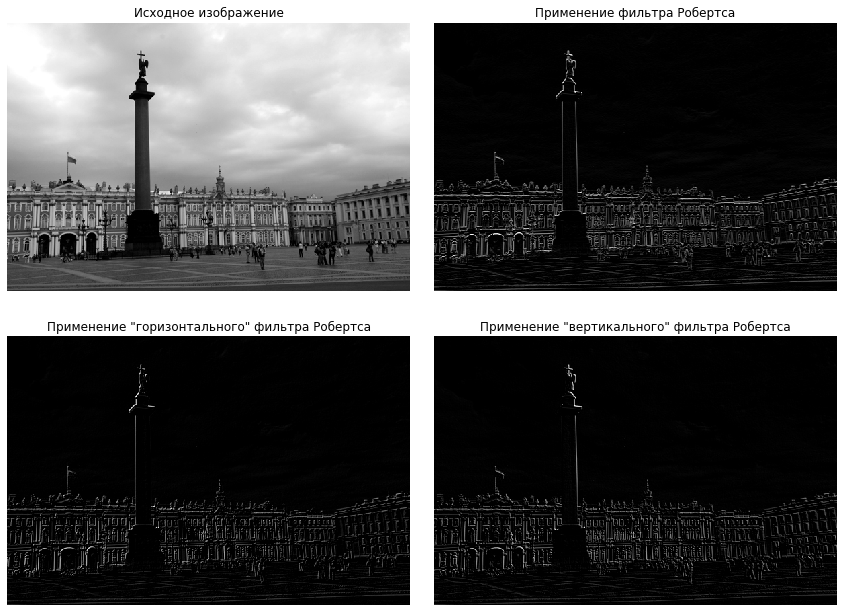

In [10]:
plot_roberts(spb, 'spb')

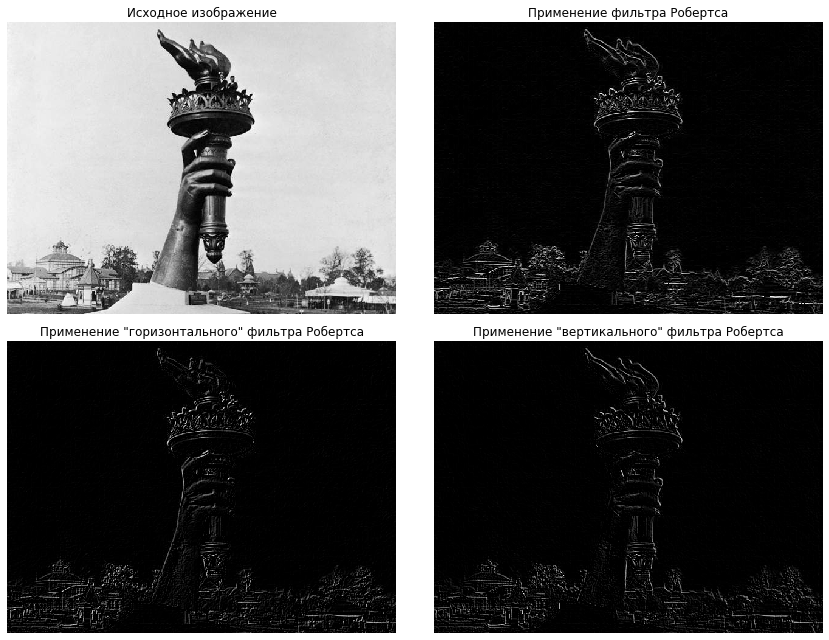

In [11]:
plot_roberts(ny, 'ny')

# Sobel Operator

* Looks for edges in both horizontal and vertical directions, then combine the information into a single metric.
* The masks are as follows:

$$
x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix},
y = \begin{bmatrix}
-1 & -2 & -1 \\
0  & 0  & 0 \\
1  & 2  & 1
\end{bmatrix}
$$

$$
Edge Magnitude = \sqrt{x^2 + y^2}, Edge Direction = \tan^{-1}\frac{y}{x}
$$ 

In [12]:
sx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sy = sx.T
def sobel(img):
    img_x = cv.filter2D(img, -1, sx).astype(np.single)
    img_y = cv.filter2D(img, -1, sy).astype(np.single)
    img_sobel = np.sqrt(img_x ** 2 + img_y ** 2)
    return img_sobel, img_x, img_y

In [13]:
def plot_sobel(img, name, figsize=(12, 9)):
    img_sobel, img_x, img_y = sobel(img)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    axes[0][0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[0][0].set_title('Исходное изображение')
    axes[0][0].axis('off')

    axes[0][1].imshow(img_sobel, cmap='gray')
    axes[0][1].set_title('Применение фильтра Собеля')
    axes[0][1].axis('off')
    
    axes[1][0].imshow(img_x, cmap='gray')
    axes[1][0].set_title('Применение горизонтального фильтра Собеля')
    axes[1][0].axis('off')
    
    axes[1][1].imshow(img_y, cmap='gray')
    axes[1][1].set_title('Применение вертикального фильтра Собеля')
    axes[1][1].axis('off')

    fig.tight_layout()
    plt.savefig('pics/' + name + '_sobel.png')
    plt.show()

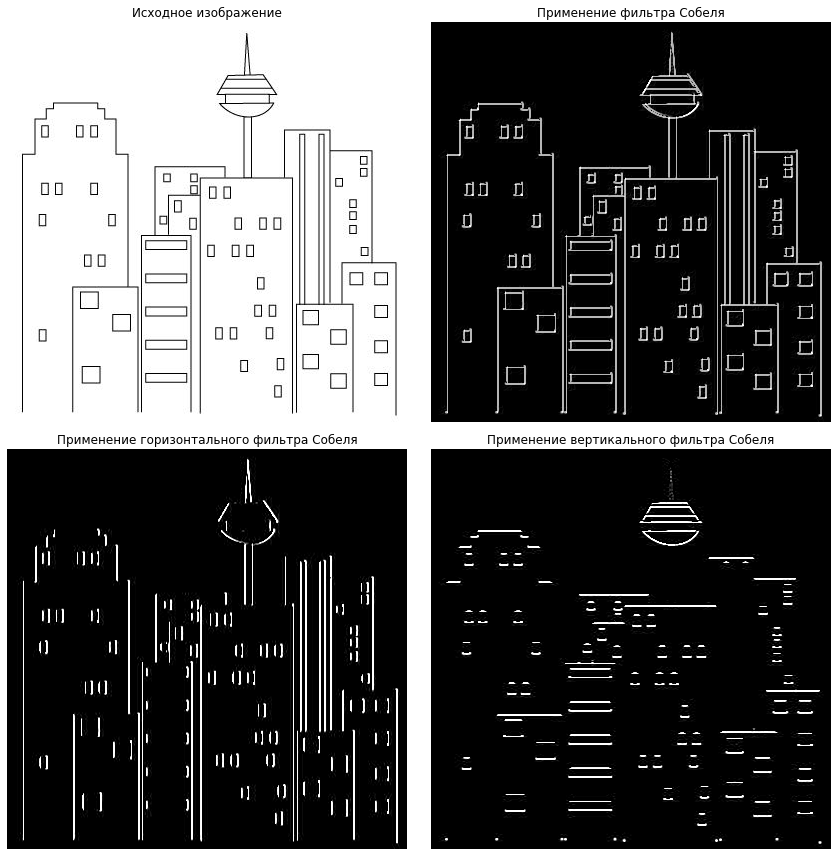

In [14]:
plot_sobel(city, 'city', figsize=(12, 12))

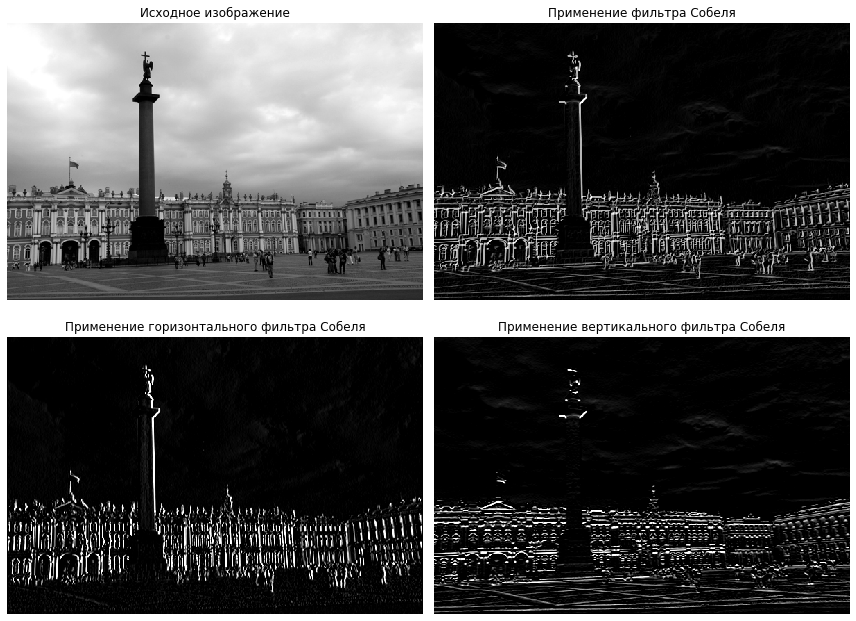

In [15]:
plot_sobel(spb, 'spb')

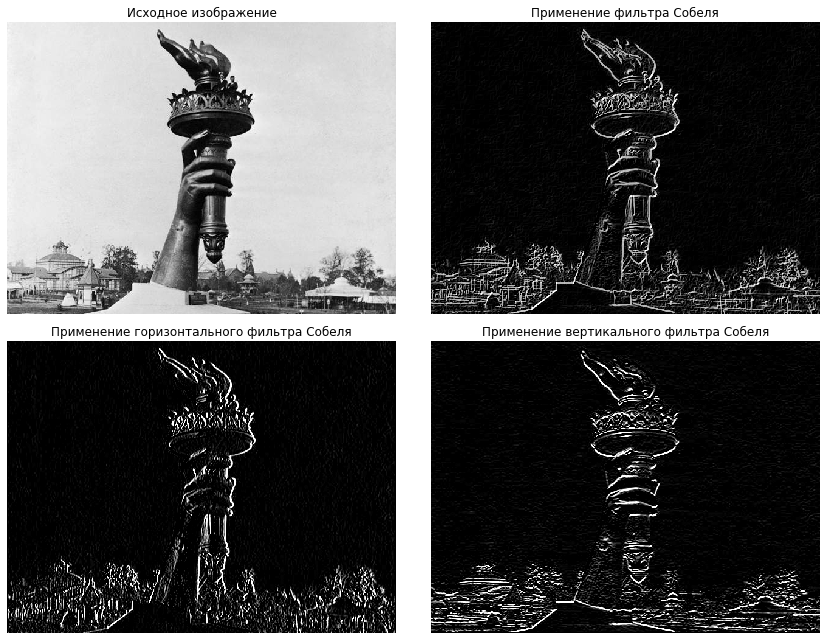

In [16]:
plot_sobel(ny, 'ny')

# Prewitt Operator

* Similar to the Sobel, with different mask coefficients:

$$
x = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix},
y = \begin{bmatrix}
-1 & -1 & -1 \\
0  & 0  & 0 \\
1  & 1  & 1
\end{bmatrix}
$$

$$
Edge Magnitude = \sqrt{x^2 + y^2}, Edge Direction = \tan^{-1}\frac{y}{x}
$$ 

In [17]:
px = np.array([
    [-1, 0, 1], 
    [-1, 0, 1], 
    [-1, 0, 1]]
)
py = px.T
def prewitt(img):
    img_x = cv.filter2D(img, -1, px).astype(np.single)
    img_y = cv.filter2D(img, -1, py).astype(np.single)
    img_prewitt = np.sqrt(img_x ** 2 + img_y ** 2)
    return img_prewitt, img_x, img_y

In [18]:
def plot_prewitt(img, name, figsize=(12, 9)):
    img_prewitt, img_x, img_y = prewitt(img)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    axes[0][0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[0][0].set_title('Исходное изображение')
    axes[0][0].axis('off')

    axes[0][1].imshow(img_prewitt, cmap='gray')
    axes[0][1].set_title('Применение фильтра Приютта')
    axes[0][1].axis('off')
    
    axes[1][0].imshow(img_x, cmap='gray')
    axes[1][0].set_title('Применение горизонтального фильтра Прюитта')
    axes[1][0].axis('off')
    
    axes[1][1].imshow(img_y, cmap='gray')
    axes[1][1].set_title('Применение вертикального фильтра Прюитта')
    axes[1][1].axis('off')

    fig.tight_layout()
    plt.savefig('pics/' + name + '_prewitt.png')
    plt.show()

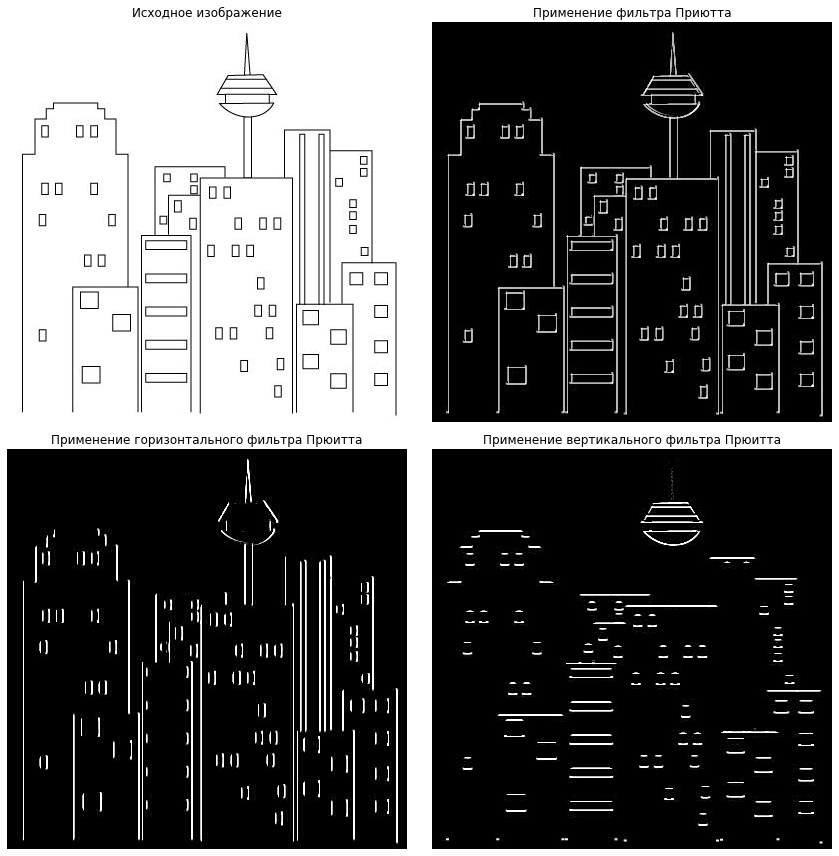

In [19]:
plot_prewitt(city, 'city', figsize=(12, 12))

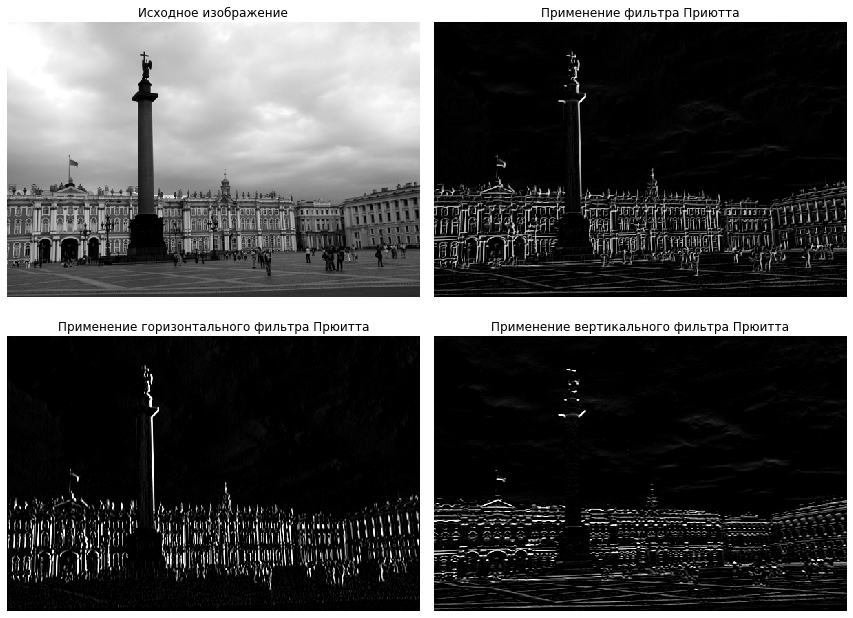

In [20]:
plot_prewitt(spb, 'spb')

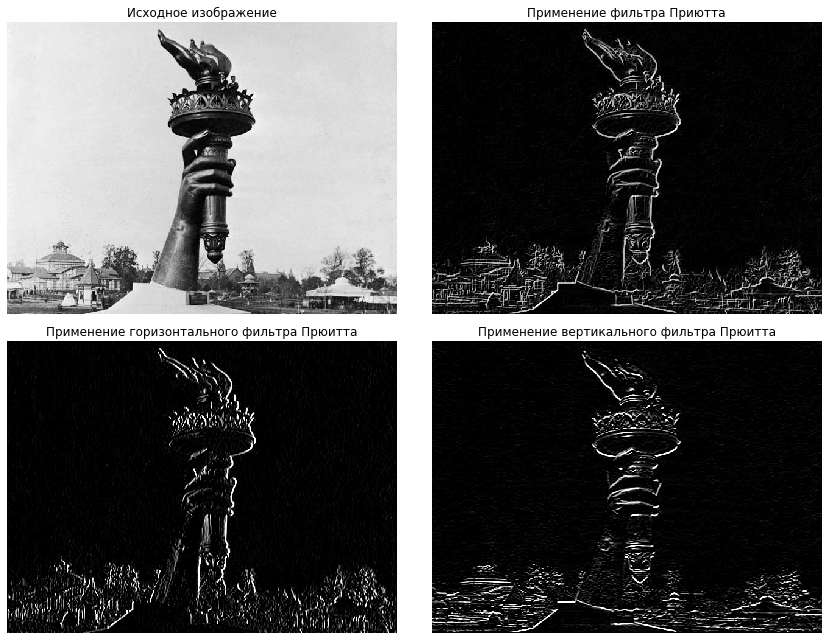

In [21]:
plot_prewitt(ny, 'ny')

# Side by side

In [22]:
def plot_all(img, name, figsize=(12, 9)):
    img_roberts, _, _ = roberts(img)
    img_sobel, _, _ = sobel(img)
    img_prewitt, _, _ = prewitt(img)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    axes[0][0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[0][0].set_title('Исходное изображение')
    axes[0][0].axis('off')

    axes[0][1].imshow(img_roberts, cmap='gray')
    axes[0][1].set_title('Применение фильтра Робертса')
    axes[0][1].axis('off')
    
    axes[1][0].imshow(img_sobel, cmap='gray')
    axes[1][0].set_title('Применение фильтра Собеля')
    axes[1][0].axis('off')
    
    axes[1][1].imshow(img_prewitt, cmap='gray')
    axes[1][1].set_title('Применение фильтра Прюитта')
    axes[1][1].axis('off')

    fig.tight_layout()
    plt.savefig('pics/' + name + '_all.png')
    plt.show()

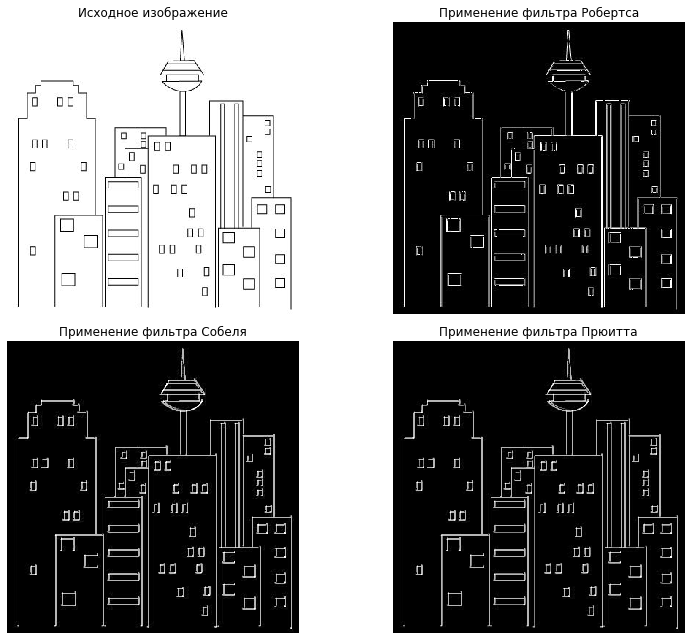

In [23]:
plot_all(city, 'city')

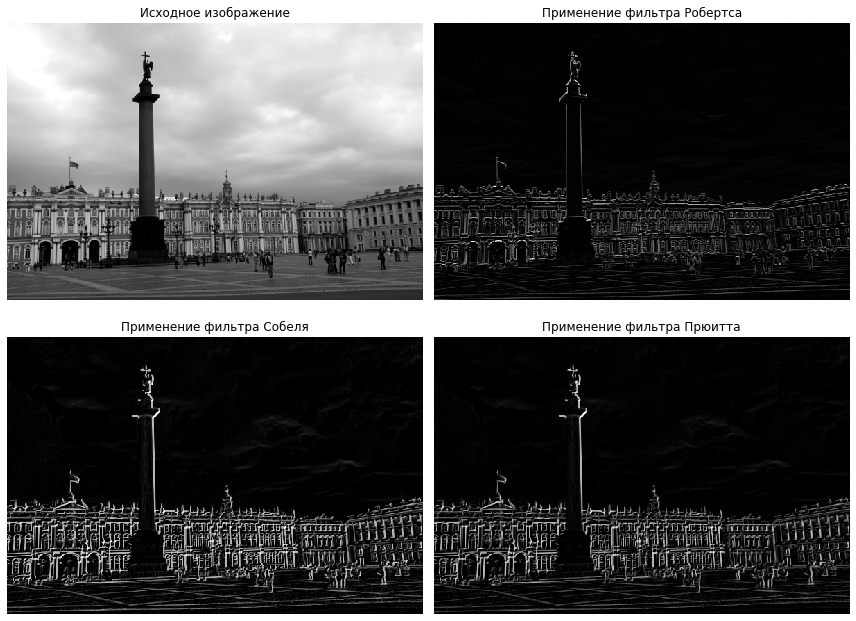

In [24]:
plot_all(spb, 'spb')

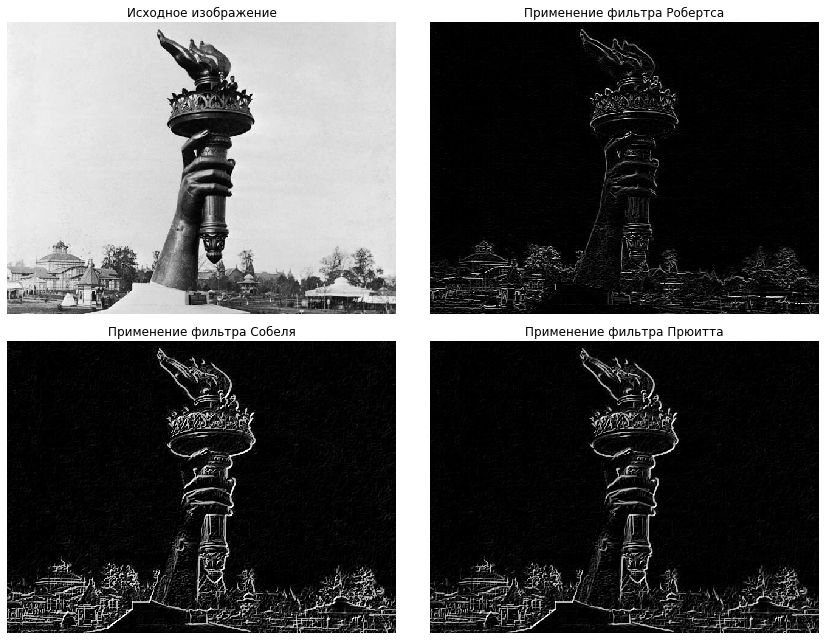

In [25]:
plot_all(ny, 'ny')